In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

from sklearn import datasets
from sklearn import manifold
%matplotlib inline

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [3]:
#Fetching Data

data = datasets.fetch_openml('mnist_784',version=1,return_X_y=True)
pixel_values,targets = data
targets = targets.astype(int)

In [13]:
pixel_values.shape

(70000, 784)

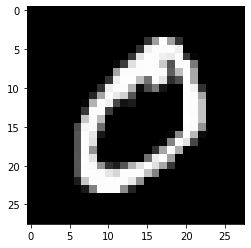

In [6]:
single_image = pixel_values[1,:].reshape(28,28)
plt.imshow(single_image,cmap='gray')

In [8]:
# Reducing dimensionality using t-sne technique.
# Convert from 7000 x 784 to 7000 x 2

tsne = manifold.TSNE(n_components=2,random_state=42)
transformed_data = tsne.fit_transform(pixel_values[:3000,:])

In [9]:
# COnvert to DataFrame

tsne_df = pd.DataFrame(np.column_stack((transformed_data,targets[:3000])), columns=["x","y","targets"])

tsne_df.loc[:,"targets"] = tsne_df.targets.astype(int)

C:\Users\Ganesh.Naik\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


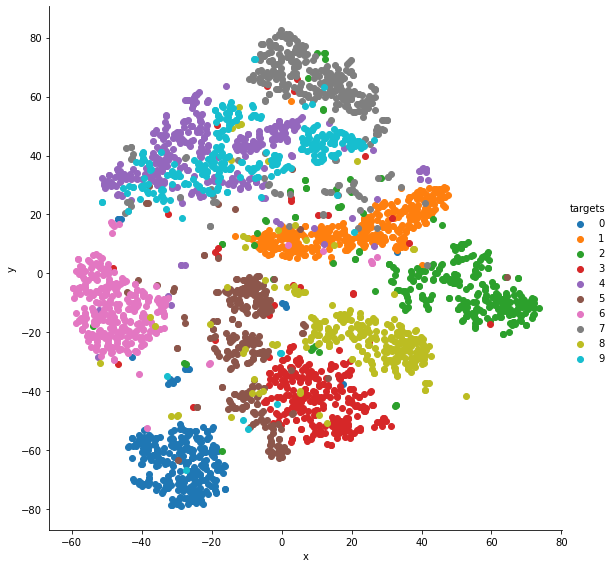

In [14]:
# Visualising Unsupervised Datasets

grid = sns.FacetGrid(tsne_df,hue='targets',size=8)
grid.map(plt.scatter,"x","y").add_legend()